In [48]:
import pandas
import matplotlib.pyplot as plt
import geopandas
# from shapely.geometry import multipolygon, polygon, Polygon, MultiPolygon

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pandas.options.display.max_columns = 100

### Notebook objectives

* Load in data of 2019 General election data (2024) when available
* Understand how to plot a shape file
* How to link the Results to the consituency map shape file

## Data Loading

* Created a Data drive to store the files. Able to read in the voting results data and parliment boundaries shape data and basically plot it.
* The results data shows consituency id (ONS ID), as well as winning party, type of result (Gain vs Hold) and vote breakdown.
* loading in the Geopandas data shows that the table is GeoDataFrame type.
* The UK is plotted out which shows that the plotting (and adding) of each constituency to the plot forms a complete picture

,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Declaration time,Member first name,Member surname,Member gender,Result,First party,Second party,Electorate,Valid votes,Invalid votes,Majority,Con,Lab,LD,BRX,Green,SNP,PC,DUP,SF,SDLP,UUP,APNI,All other candidates,Of which other winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,Kinnock,Male,Lab hold,Lab,Con,50750,31598,82,10490,6518,17008,1072,3108,450,0,2711,0,0,0,0,0,731,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,Millar,Male,Con hold,Con,Lab,44699,31865,123,2034,14687,12653,1821,0,0,0,2704,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Burgh,2019-12-13 03:13:00,Kirsty,Blackman,Female,SNP hold,SNP,Con,62489,37413,72,12670,7535,4939,2846,1008,880,20205,0,0,0,0,0,0,0,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Burgh,2019-12-13 03:34:00,Stephen,Flynn,Male,SNP gain from Con,SNP,Con,65719,45638,131,3990,16398,3834,5018,0,0,20388,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2019-12-13 02:59:00,Neil,Gray,Male,SNP hold,SNP,Lab,64011,39772,91,5201,7011,12728,1419,0,685,17929,0,0,0,0,0,0,0,0


,PCON19CD,PCON19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E14000530,Aldershot,484884,155126,-0.78410,51.2890,bd957fac-c29e-4768-9c7e-2ab73e3beaa0,"POLYGON ((485406.902 159918.603, 485417.299 15..."
1,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.6209,2add8fa0-9025-44ac-9be3-29ef7ac3387c,"POLYGON ((406519.098 305054.298, 406487.198 30..."
2,E14000532,Altrincham and Sale West,374132,389051,-2.39049,53.3977,7901696d-7a19-4d35-9af9-748a1f6045bd,"POLYGON ((379104.096 393143.903, 379102.802 39..."
3,E14000533,Amber Valley,440478,349675,-1.39770,53.0428,656925a9-0540-4499-863a-68c4ade11f9f,"POLYGON ((444868.402 353958.1, 444868.6 353937..."
4,E14000534,Arundel and South Downs,510686,115542,-0.42635,50.9287,688f05e1-ccc7-4fa1-badf-a75fdfed8fad,"MULTIPOLYGON (((505225.64 118144.51, 505218.08..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PCON19CD  650 non-null    object  
 1   PCON19NM  650 non-null    object  
 2   BNG_E     650 non-null    int64   
 3   BNG_N     650 non-null    int64   
 4   LONG      650 non-null    float64 
 5   LAT       650 non-null    float64 
 6   GlobalID  650 non-null    object  
 7   geometry  650 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 40.8+ KB


<Axes: >

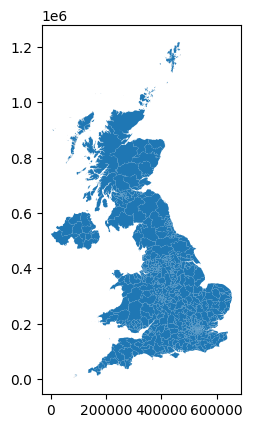

In [49]:
# Read in the data, first row is table header
data = "data/raw_data/ge_2019_results.xlsx"
results = pandas.read_excel(data, header=1)

map_data = "data/raw_data/PCON_DEC_2019_UK_BFC.shp"
boundaries_map = geopandas.read_file(map_data)
results.head()
boundaries_map.head()
boundaries_map.info()
boundaries_map.plot()


### Joining data together

* Looked ID comparison and name comparison to see how to join the data.
* ID data appears to match one-to-one.
* The name data appears not quite match with some values appearing in 1 dataframe but not the other, this appears to be punctuation related.

In [50]:
[x for x in results["ONS ID"].values if x not in boundaries_map["PCON19CD"].values]
[x for x in boundaries_map["PCON19CD"].values if x not in results["ONS ID"].values]

[]

[]

In [51]:
# merge data together now that we know there osa 1 to 1 match
all_data_df = (results.merge(boundaries_map,
                            how="inner",
                            left_on="ONS ID",
                            right_on="PCON19CD")
    .sort_values(["Constituency name"], ignore_index=True)
)       

## Hexagonal Grid Data

,OBJECTID_1,NAME,DESCRIPTIO,CODE,Region_Nam,Shape_Leng,Shape_Area,geometry
0,1,North Thanet Co Const,Westminster Constituency,E14000852,South East Euro Region,106798.877597,8.231572e+08,"POLYGON ((221951.24 6695038.766, 230851.324 67..."
1,2,Canterbury Co Const,Westminster Constituency,E14000619,South East Euro Region,106798.887591,8.231573e+08,"POLYGON ((191691.728 6712838.621, 200591.584 6..."
2,3,South Thanet Co Const,Westminster Constituency,E14000948,South East Euro Region,106798.924488,8.231579e+08,"POLYGON ((191691.728 6677238.933, 200591.584 6..."
3,4,Norwich South Boro Const,Westminster Constituency,E14000864,Eastern Euro Region,106799.371719,8.231648e+08,"POLYGON ((161431.995 6944236.684, 170331.757 6..."
4,5,Great Yarmouth Co Const,Westminster Constituency,E14000717,Eastern Euro Region,106799.363204,8.231647e+08,"POLYGON ((161431.995 6908636.847, 170331.757 6..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  650 non-null    int64   
 1   NAME        650 non-null    object  
 2   DESCRIPTIO  650 non-null    object  
 3   CODE        650 non-null    object  
 4   Region_Nam  650 non-null    object  
 5   Shape_Leng  650 non-null    float64 
 6   Shape_Area  650 non-null    float64 
 7   geometry    650 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 40.8+ KB


<Axes: >

[]

[]

,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Declaration time,Member first name,Member surname,Member gender,Result,First party,Second party,Electorate,Valid votes,Invalid votes,Majority,Con,Lab,LD,BRX,Green,SNP,PC,DUP,SF,SDLP,UUP,APNI,All other candidates,Of which other winner,OBJECTID_1,NAME,DESCRIPTIO,CODE,Region_Nam,Shape_Leng,Shape_Area,geometry
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,Kinnock,Male,Lab hold,Lab,Con,50750,31598,82,10490,6518,17008,1072,3108,450,0,2711,0,0,0,0,0,731,0,601,Aberavon Co Const,Westminster Constituency,W07000049,Wales Euro Region,106799.089666,8.231604e+08,"POLYGON ((-564801.706 6837437.489, -555901.943..."
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,Millar,Male,Con hold,Con,Lab,44699,31865,123,2034,14687,12653,1821,0,0,0,2704,0,0,0,0,0,0,0,589,Aberconwy Co Const,Westminster Constituency,W07000058,Wales Euro Region,106799.249454,8.231629e+08,"POLYGON ((-534541.898 7104435.262, -525642.116..."
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Burgh,2019-12-13 03:13:00,Kirsty,Blackman,Female,SNP hold,SNP,Con,62489,37413,72,12670,7535,4939,2846,1008,880,20205,0,0,0,0,0,0,0,0,381,Aberdeen North Burgh Const,Westminster Constituency,S14000001,Scotland Euro Region,106798.622761,8.231532e+08,"POLYGON ((-352983.571 7887628.366, -344083.814..."


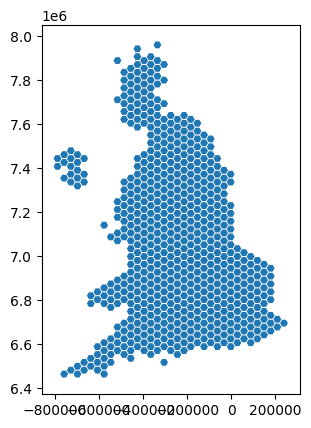

In [52]:
hex_map_data = "data/raw_data/GB_Hex_Cartogram_Const.shp"
boundaries_hex = geopandas.read_file(hex_map_data)
boundaries_hex.head()
boundaries_hex.info()
boundaries_hex.plot()

# This shows that we have a one to one match of hexagonal grids and the constituency
[x for x in results["ONS ID"].values if x not in boundaries_hex["CODE"].values]
[x for x in boundaries_hex["CODE"].values if x not in results["ONS ID"].values]

# merge data together now that we know there osa 1 to 1 match
all_data_hex_df = (results.merge(boundaries_hex,
                            how="inner",
                            left_on="ONS ID",
                            right_on="CODE")
    .sort_values(["NAME"], ignore_index=True)
)
all_data_hex_df.head(3)       

### Plotting Plymouth Data

* Decided to plot plymouth data to investigate the plotting further
* **NOTE** that i have manually assigned colours for visual representation at this point


,PCON19CD,PCON19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
349,E14000879,"Plymouth, Moor View",248146,59475,-4.13876,50.4154,559b8cb9-295a-4900-89b8-2966a5094a84,"MULTIPOLYGON (((244905.701 60438.299, 244898.2..."
350,E14000880,"Plymouth, Sutton and Devonport",247632,55528,-4.14439,50.3798,19b4c1b5-556f-4721-8994-bd676c6e05a9,"MULTIPOLYGON (((246164.7 53242.1, 246158.45 53..."


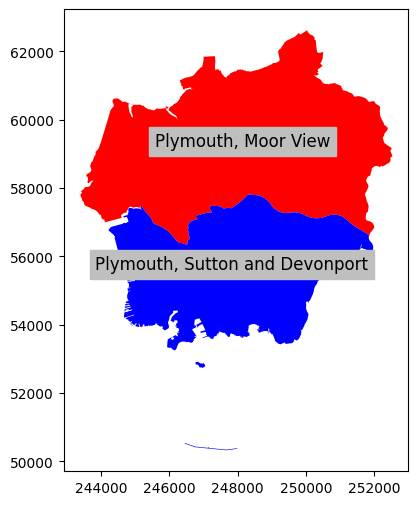

In [53]:
color_map = {349:"red",
              350:"blue"}

ply_df = boundaries_map.loc[boundaries_map["PCON19NM"].str.contains("Plymouth")]
ply_df

#ply_df.info()
fig, ax = plt.subplots(figsize=(10,6))

for idx, row in ply_df.iterrows():
    row_df = geopandas.GeoDataFrame(row.to_frame().T)
    #row_df.info()
    _ = row_df.plot(ax=ax, 
            color=color_map[idx],
            label=row_df["PCON19NM"].values.tolist()[0] )
    
    _ = row_df.apply(lambda x: ax.annotate(text=x['PCON19NM'], 
                                       xy=x.geometry.centroid.coords[0], 
                                       fontsize = 12,
                                       backgroundcolor = '0.75',
                                       ha='center'), axis=1);



### Plotting all data (ex NI) 

WE want to plot the UK data with the winning parlimentary colours

In [54]:
all_data_df = geopandas.GeoDataFrame(all_data_df)
all_data_hex_df = geopandas.GeoDataFrame(all_data_hex_df)
colour_map = {"Lab":"red",
              "Con":"blue",
              "SNP":"gold",
              "LD":"orange",
              "PC":"darkolivegreen",
              "BRX":"teal",
              "Green":"green",
              "DUP":"purple",
              "SF":"purple",
              "SDLP":"purple",
              "Spk":"purple",
              "APNI":"purple",
              "Other":"grey",
              }

### Editing Table Data

* create useful colums like proportional votes
* aggregate minor party / independent votes
* drop columns not required

In [55]:
all_data_df = (
    all_data_df
    .drop(columns=[
        "ONS region ID",
        'Constituency type', 
        'Declaration time',
       'Member first name', 
       'Member surname', 
       'Member gender',
       'Electorate',
       'Invalid votes', 
       'Majority',
       'DUP', 
       'SF', 
       'SDLP', 
       'UUP', 
       'APNI',
       'Of which other winner', 
       'PCON19CD', 
       'PCON19NM',
       'GlobalID',
    ])
)

all_data_hex_df = (
    all_data_hex_df
    .drop(columns=[
        "ONS region ID",
        'Constituency type', 
        'Declaration time',
       'Member first name', 
       'Member surname', 
       'Member gender',
       'Electorate',
       'Invalid votes', 
       'Majority',
       'DUP', 
       'SF', 
       'SDLP', 
       'UUP', 
       'APNI',
       'Of which other winner', 
       'OBJECTID_1', 
       "NAME",
        "DESCRIPTIO",
       "Region_Nam",
    ])
)

parties = [
    "Con",
    "Lab",
    "LD",
    "BRX",
    "Green",
    "PC",
    "SNP",
    'All other candidates',
    ]
for party in parties:
    all_data_df[f"{party}_prop"] = (
        round(
        all_data_df[party] * 
        (
            100 / all_data_df["Valid votes"] 
        )
        , 
        2)
    )
    all_data_hex_df[f"{party}_prop"] = (
        round(
        all_data_hex_df[party] * 
        (
            100 / all_data_hex_df["Valid votes"] 
        )
        , 
        2)
    )    
all_data_df = all_data_df.rename( columns = {"All other candidates":"Other",
                                             "All other candidates_prop":"Other_prop"}
                                )  
# We are excluding NI due to different electoral system
all_data_df = all_data_df[~(all_data_df["Country name"]=="Northern Ireland")]

# export as shape file
all_data_df.to_file("data/processed_data/ge_2019_data.shp")

all_data_hex_df = all_data_hex_df.rename( columns = {"All other candidates":"Other",
                                             "All other candidates_prop":"Other_prop"}
                                )  
# We are excluding NI due to different electoral system
all_data_hex_df = all_data_hex_df[~(all_data_hex_df["Country name"]=="Northern Ireland")]

# export as shape file
all_data_hex_df.to_file("data/processed_data/ge_2019_hex_data.shp")

C:\Users\Harrison\AppData\Local\Temp\ipykernel_12116\1540301449.py:86: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_data_df.to_file("data/processed_data/ge_2019_data.shp")
c:\Users\Harrison\anaconda3\envs\uk_election\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Constituency name' to 'Constituen'
  ogr_write(
c:\Users\Harrison\anaconda3\envs\uk_election\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'County name' to 'County nam'
  ogr_write(
c:\Users\Harrison\anaconda3\envs\uk_election\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Region name' to 'Region nam'
  ogr_write(
c:\Users\Harrison\anaconda3\envs\uk_election\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Country name' to 'Country na'
  ogr_write(
c:\Users\Harrison\anaconda3\envs\uk_election\Lib\site-packag

## Investigation into swing votes

In [56]:
df = all_data_hex_df.copy()
df.columns.values

array(['ONS ID', 'Constituency name', 'County name', 'Region name',
       'Country name', 'Result', 'First party', 'Second party',
       'Valid votes', 'Con', 'Lab', 'LD', 'BRX', 'Green', 'SNP', 'PC',
       'Other', 'CODE', 'Shape_Leng', 'Shape_Area', 'geometry',
       'Con_prop', 'Lab_prop', 'LD_prop', 'BRX_prop', 'Green_prop',
       'PC_prop', 'SNP_prop', 'Other_prop'], dtype=object)

In [65]:
# swing from {from_party} to {to_party} is 5%
swing = 0
from_party = "Con"
to_party = "Lab"

parties = [
    "Con",
    "Lab",
    "LD",
    "BRX",
    "Green",
    "PC",
    "SNP",
    'Other',
    ]
for party in parties:
    df[f"{party}_prop_new"] = df[f"{party}_prop"].copy()
        
# positive swings from {from_party} to {to_party}
df.loc[(df[f"{from_party}_prop"] >= (swing/2)) &
       (swing>=0),
       f"{from_party}_prop_new"] = round( (df[f"{from_party}_prop"] - (swing/2)), 2)
df.loc[(df[f"{from_party}_prop"] >= (swing/2)) &
       (swing>=0),
       f"{to_party}_prop_new"] = round( (df[f"{to_party}_prop"] + (swing/2)), 2)

df.loc[(df[f"{from_party}_prop"] < (swing/2)) &
       (swing>=0),
       f"{from_party}_prop_new"] = 0
df.loc[(df[f"{from_party}_prop"] < (swing/2)) &
       (swing>=0),
       f"{to_party}_prop_new"] = round( (df[f"{from_party}_prop"] + df[f"{to_party}_prop"]), 2)

# Negative swings: Postive from {to_party} to {from_party}
# watch for switch of ( +/- sign due to negative swing value)
df.loc[(df[f"{to_party}_prop"] >= (abs(swing/2))) &
       (swing<0),
       f"{from_party}_prop_new"] = round( (df[f"{from_party}_prop"] - (swing/2)), 2)
df.loc[(df[f"{to_party}_prop"] >= (abs(swing/2))) &
       (swing<0),
       f"{to_party}_prop_new"] = round( (df[f"{to_party}_prop"] + (swing/2)), 2)

df.loc[(df[f"{to_party}_prop"] < (abs(swing/2))) &
       (swing<0),
       f"{to_party}_prop_new"] = 0
df.loc[(df[f"{to_party}_prop"] < (abs(swing/2))) &
       (swing<0),
       f"{from_party}_prop_new"] = round( (df[f"{to_party}_prop"] + df[f"{from_party}_prop"]), 2)

# Creating a new column based on multiple conditions
df["new_party"] = [
    "Con" if a > max(b, c, d, e, f, g, h) else
    "Lab" if b > max(a, c, d, e, f, g, h) else
    "LD" if c > max(a, b, d, e, f, g, h) else
    "BRX" if d > max(a, b, c, e, f, g, h) else
    "Green" if e > max(a, b, c, d, f, g, h) else
    "PC" if f > max(a, b, c, d, e, g, h) else
    "SNP" if g > max(a, b, c, d, e, f, h) else
    "Other"
    for a, b, c, d, e, f, g, h in zip(df["Con_prop_new"],
                                      df["Lab_prop_new"],
                                      df["LD_prop_new"],
                                      df["BRX_prop_new"],
                                      df["Green_prop_new"],
                                      df["PC_prop_new"],
                                      df["SNP_prop_new"],
                                      df["Other_prop_new"]
                                      )
]

In [66]:
df

,ONS ID,Constituency name,County name,Region name,Country name,Result,First party,Second party,Valid votes,Con,Lab,LD,BRX,Green,SNP,PC,Other,CODE,Shape_Leng,Shape_Area,geometry,Con_prop,Lab_prop,LD_prop,BRX_prop,Green_prop,PC_prop,SNP_prop,Other_prop,Con_prop_new,Lab_prop_new,LD_prop_new,BRX_prop_new,Green_prop_new,PC_prop_new,SNP_prop_new,Other_prop_new,new_party
0,W07000049,Aberavon,West Glamorgan,Wales,Wales,Lab hold,Lab,Con,31598,6518,17008,1072,3108,450,0,2711,731,W07000049,106799.089666,8.231604e+08,"POLYGON ((-564801.706 6837437.489, -555901.943...",20.63,53.83,3.39,9.84,1.42,8.58,0.00,2.31,20.63,53.83,3.39,9.84,1.42,8.58,0.00,2.31,Lab
1,W07000058,Aberconwy,Clwyd,Wales,Wales,Con hold,Con,Lab,31865,14687,12653,1821,0,0,0,2704,0,W07000058,106799.249454,8.231629e+08,"POLYGON ((-534541.898 7104435.262, -525642.116...",46.09,39.71,5.71,0.00,0.00,8.49,0.00,0.00,46.09,39.71,5.71,0.00,0.00,8.49,0.00,0.00,Con
2,S14000001,Aberdeen North,Scotland,Scotland,Scotland,SNP hold,SNP,Con,37413,7535,4939,2846,1008,880,20205,0,0,S14000001,106798.622761,8.231532e+08,"POLYGON ((-352983.571 7887628.366, -344083.814...",20.14,13.20,7.61,2.69,2.35,0.00,54.01,0.00,20.14,13.20,7.61,2.69,2.35,0.00,54.01,0.00,SNP
3,S14000002,Aberdeen South,Scotland,Scotland,Scotland,SNP gain from Con,SNP,Con,45638,16398,3834,5018,0,0,20388,0,0,S14000002,106799.089752,8.231604e+08,"POLYGON ((-322723.764 7869828.499, -313823.978...",35.93,8.40,11.00,0.00,0.00,0.00,44.67,0.00,35.93,8.40,11.00,0.00,0.00,0.00,44.67,0.00,SNP
4,S14000003,Airdrie and Shotts,Scotland,Scotland,Scotland,SNP hold,SNP,Lab,39772,7011,12728,1419,0,685,17929,0,0,S14000003,106799.041709,8.231597e+08,"POLYGON ((-413503.186 7745229.739, -404603.403...",17.63,32.00,3.57,0.00,1.72,0.00,45.08,0.00,17.63,32.00,3.57,0.00,1.72,0.00,45.08,0.00,SNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,E14001059,Wythenshawe and Sale East,Greater Manchester,North West,England,Lab hold,Lab,Con,44759,13459,23855,3111,2717,1559,0,0,58,E14001059,106798.723982,8.231548e+08,"POLYGON ((-383243.395 7086635.327, -374343.2 7...",30.07,53.30,6.95,6.07,3.48,0.00,0.00,0.13,30.07,53.30,6.95,6.07,3.48,0.00,0.00,0.13,Lab
646,E14001060,Yeovil,Somerset,South West,England,Con hold,Con,LD,59260,34588,3761,18407,0,1629,0,0,875,E14001060,106799.045101,8.231597e+08,"POLYGON ((-534541.898 6570440.011, -525642.116...",58.37,6.35,31.06,0.00,2.75,0.00,0.00,1.48,58.37,6.35,31.06,0.00,2.75,0.00,0.00,1.48,Con
647,W07000041,Ynys Môn,Gwynedd,Wales,Wales,Con gain from Lab,Con,Lab,36552,12959,10991,0,2184,0,0,10418,0,W07000041,106798.658930,8.231538e+08,"POLYGON ((-595061.534 7140034.804, -586161.734...",35.45,30.07,0.00,5.98,0.00,28.50,0.00,0.00,35.45,30.07,0.00,5.98,0.00,28.50,0.00,0.00,Con
648,E14001061,York Central,North Yorkshire,Yorkshire and The Humber,England,Lab hold,Lab,Con,49505,13767,27312,4149,1479,2107,0,0,691,E14001061,106799.091305,8.231605e+08,"POLYGON ((-141165.46 7442632.092, -132265.676 ...",27.81,55.17,8.38,2.99,4.26,0.00,0.00,1.40,27.81,55.17,8.38,2.99,4.26,0.00,0.00,1.40,Lab


<Axes: >

(np.float64(-828328.3651802001),
 np.float64(309259.2963026961),
 np.float64(6371924.800492203),
 np.float64(8050543.491499708))

[]

[]

[]

[]

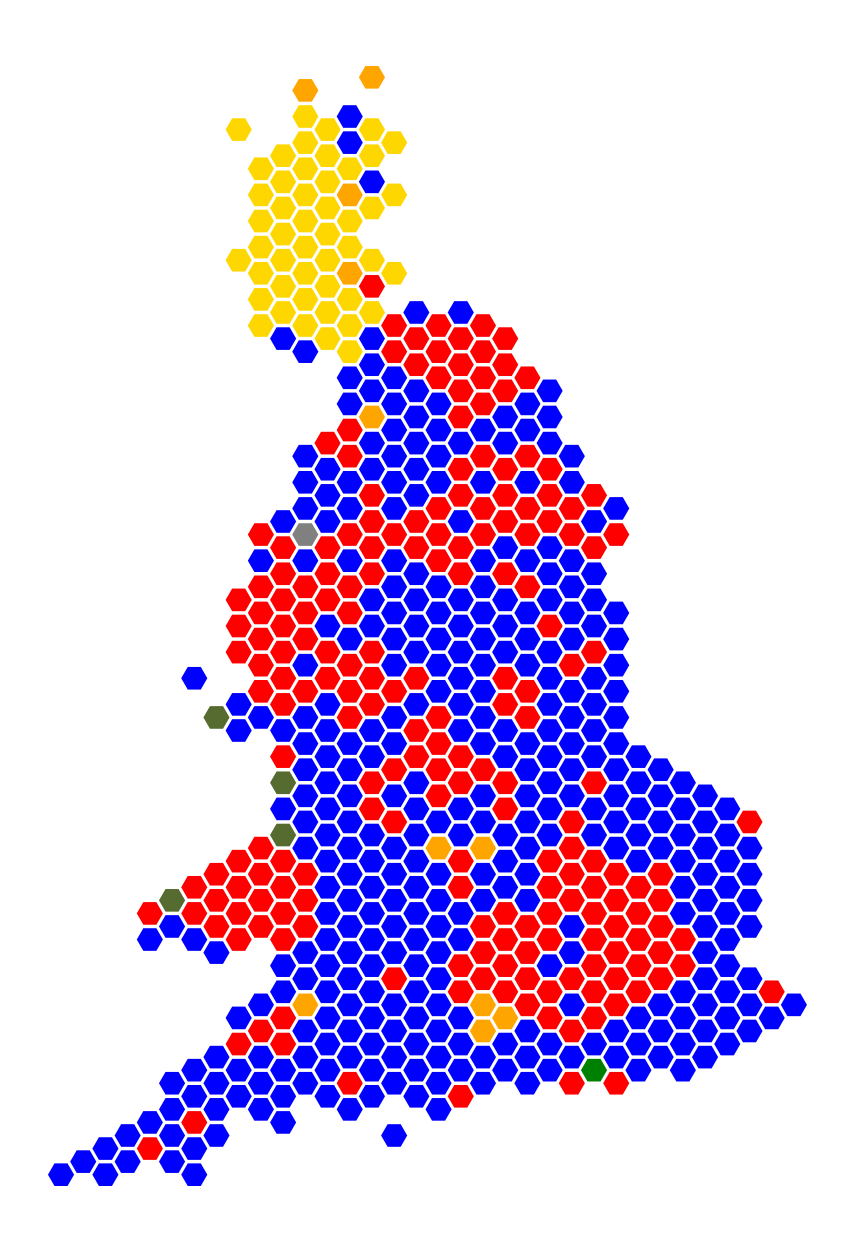

In [67]:
#ply_df.info()
fig, ax = plt.subplots(figsize=(25,16))

df.plot(ax=ax, 
    color=df["new_party"].map(colour_map)
    )

# Set custom y range
#ax.set_ylim(0, 0.99e+06)  # Set y-axis range from 0 to 50

# Remove axis, ticks, tick values, and border
ax.axis('off')  # Remove the axis
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.xaxis.set_ticklabels([])  # Remove x-axis tick labels
ax.yaxis.set_ticklabels([])  # Remove y-axis tick labels
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
ax.spines['left'].set_visible(False)  # Remove the left spine
ax.spines['bottom'].set_visible(False)  # Remove the bottom spine

plt.show()